In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [19]:
def check_df(dataframe, head=5):
    print('SHAPE:\n', dataframe.shape)
    print('\nINFO:\n', dataframe.info())
    print('\nNULL:\n', dataframe.isnull().sum())
    print('\nDESCRIBE:\n', dataframe.describe().T)
    print('\nTAIL:\n', dataframe.tail())
check_df(df)

SHAPE:
 (10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB

INFO:
 None

NULL:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

DESCRIBE:
                                 

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


**YORUM**

* Ortalama Çalışma Süresi 4.99=~ 5 saattir. En az çalışan öğrenci 1, en çok çalışan öğrenci ise 9 saat çalışmıştır. 
* Önceki Skorlar ortalaması 69.44dür.
* Uyuma Saati Ortalaması 6.53'tür.
* Örnek Soru Çözme ortalaması 4-5'tir
* Performans İndeksi ortalaması 55'tir

In [21]:
for col in df.columns:
    print(df[col].value_counts())

Hours Studied
1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: count, dtype: int64
Previous Scores
54    216
87    208
56    192
62    184
89    182
60    181
53    181
77    181
52    176
58    176
57    176
49    175
66    175
65    175
84    175
91    175
97    174
79    174
40    173
83    173
75    172
70    172
93    172
47    172
92    172
90    172
42    171
44    170
48    170
95    169
41    169
67    168
43    167
73    166
61    165
78    165
88    164
59    163
63    163
46    163
86    162
81    161
71    159
99    159
85    159
96    159
98    158
45    154
69    153
80    153
68    153
82    148
94    148
72    148
64    147
55    144
74    143
76    142
51    140
50    123
Name: count, dtype: int64
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64
Sleep Hours
8    1804
7    1676
6    1673
9    1622
4    1619
5    1606
Name: count, dtype: int64
Sample Question Papers Practiced
6    1059
9    1051


In [22]:
df["Extracurricular Activities"] = pd.get_dummies(df["Extracurricular Activities"],dtype = int, drop_first = True)

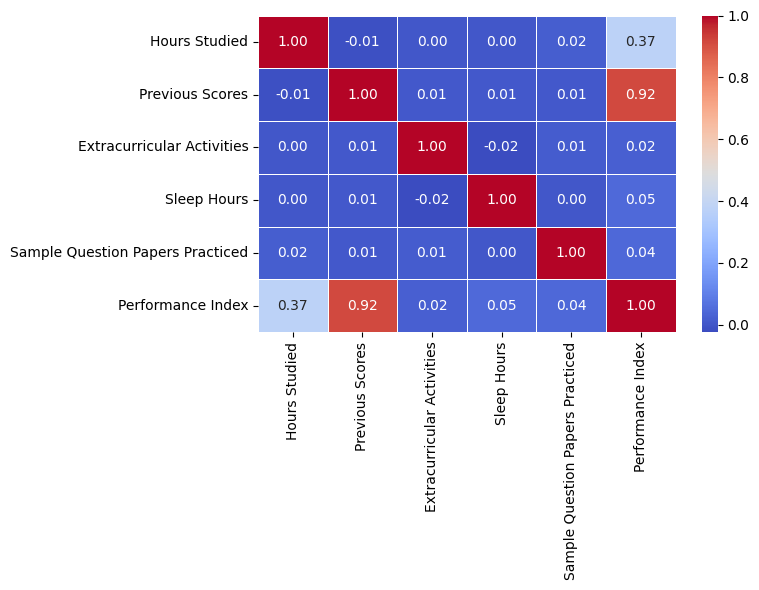

In [23]:
correlation = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.tight_layout()
plt.show()

* Performance Index ile Hours Studied arasında %37lik pozitif yönde korelasyon vardır.
* Performance Index ile Previous Scores arasında %92lik pozitif yönde korelasyon vardır.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


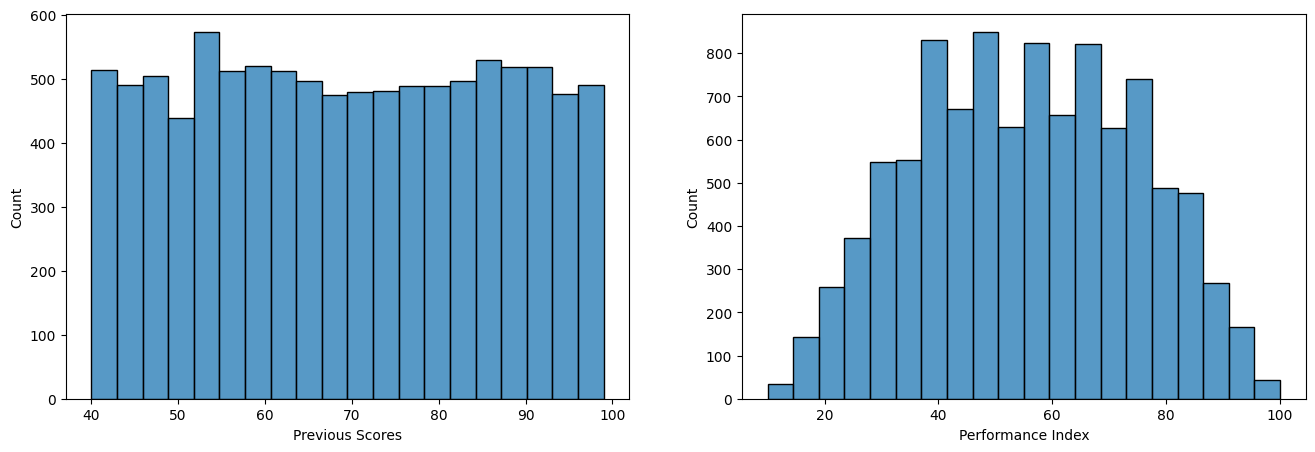

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(x ='Previous Scores', bins = 20, ax=axes[0], data=df)
sns.histplot(x = 'Performance Index', bins = 20, ax=axes[1],data=df)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop("Performance Index", axis = 1)
y = df["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score  , mean_absolute_error
r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_test,y_pred)
print(f"R^2 =  {r2} ")
print(f"Mean Square Error: {mse} ")

R^2 =  0.9887203279837657 
Mean Square Error: 4.082628398521858 


In [28]:
def feature_importance_df():
    coef = model.coef_.reshape(-1)  
    features = X.columns.tolist()  
    
    return pd.DataFrame({'Features': features, 'Coefficients': coef})

feature_importance = feature_importance_df()

In [29]:
feature_importance.groupby('Features')['Coefficients'].max().sort_values(ascending = False)

Features
Hours Studied                       2.852484
Previous Scores                     1.016988
Extracurricular Activities          0.608617
Sleep Hours                         0.476941
Sample Question Papers Practiced    0.191831
Name: Coefficients, dtype: float64

In [30]:
importance = model.coef_[0]
print(model.coef_)
print(importance)
# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

[2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
2.8524839300725717
